In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # this is an additional plotting library
%matplotlib inline

In [2]:
rating_type = pd.CategoricalDtype(
    categories=['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent', 'NA'], 
    ordered=True)

scour_type = pd.CategoricalDtype(
    categories=['Unknown', 'Critical','Unstable', 'Stable', 'Protected', 'Dry', 'No waterway'], 
    ordered=True)

types_dict = { 'Structure_id': str, 'District':'category', 'Toll':'category', 
              'Maintainer':'category', 'Urban':'category', 'Status':'category', 
              'Historic':'category', 'Service_under':'category', 'Material':'category', 
              'Design':'category', 
              'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type, 
              'Scour_rating':scour_type}

bridges = pd.read_csv('tx19_bridges_sample.csv', dtype = types_dict, index_col = 'Structure_id')
bridges

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


In [12]:
bridges2 = bridges.assign(Age_In_Years = (2021 - bridges.loc[:, 'Year']))

bridges2.loc[:, 'Age_In_Years'].describe()

count    34293.000000
mean        39.502581
std         23.860135
min          2.000000
25%         19.000000
50%         36.000000
75%         57.000000
max        121.000000
Name: Age_In_Years, dtype: float64

<AxesSubplot:>

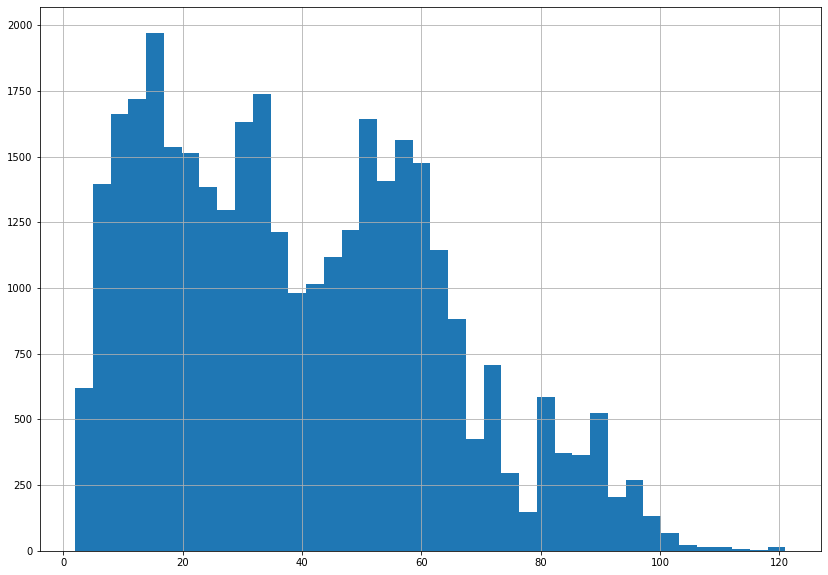

In [4]:
bridges2.loc[:, 'Age_In_Years'].hist(bins=40, figsize=(14,10))

In [13]:
bridges2.loc[:, 'Material'].unique()

['Concrete', 'Timber', 'Steel', 'Other', 'Masonry']
Categories (5, object): ['Concrete', 'Masonry', 'Other', 'Steel', 'Timber']

In [17]:
simp_mat_type = pd.CategoricalDtype(categories=['Other', 'Steel', 'Timber', 
                                                   'Concrete'], ordered=False)

mat_d = {'Masonry': 'Other'}

def simDmat(row):
    if row.Material in mat_d:
        return mat_d[row.Material]
    return row.Material

bridges2 = bridges2.assign(SimpMat = bridges.apply(simDmat, axis=1))
bridges2 = bridges2.astype({'SimpMat':simp_mat_type})

bridges2





,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age_In_Years,SimpMat
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,16,NaN
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,16,NaN
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,9,NaN
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,3.7,Good,Good,Poor,10.0,0.0,Dry,120,71,NaN
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,19.0,Good,Good,Good,64.3,40.0,No waterway,600,27,NaN
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,10.8,Good,Good,Good,35.1,40.0,No waterway,600,21,NaN
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,25,NaN


In [ ]:
#bridges.loc[:, 'Material'] = bridges.loc[:, 'Material'].replace({'Masonry': 'Other'}, inplace=True)
#bridges.loc[:, 'Design'] = bridges.loc[:, 'Design'].replace({'Arch': 'Other', 'Frame': 'Other', 'Truss': 'Other', 'Movable': 'Other', 'Suspension': 'Other'}, inplace=True)

'''# define new ordinal type for the simplified rating
simp_rating_type = pd.CategoricalDtype(categories=['Fair_or_worse', 'Satisfactory', 'Good', 
                                                   'Very Good', 'Excellent'], ordered=True)
# create a dictionary mapping existing to new values
simp_d = {'Failed':'Fair_or_worse', 'Failing':'Fair_or_worse', 'Critical':'Fair_or_worse', 
          'Serious':'Fair_or_worse', 'Poor':'Fair_or_worse', 'Fair':'Fair_or_worse'}

# define a function we can apply to map the values
def simDRating(row):
    if row.Deck_rating in simp_d:
        return simp_d[row.Deck_rating]
    return row.Deck_rating
        

# apply the function, creating a new column,
nbgs = bridges.assign(SimpDeck = bridges.apply(simDRating, axis=1))
nbgs = nbgs.astype({'SimpDeck':simp_rating_type})
#nbgs'''

In [ ]:
# create a dictionary mapping existing to new values
rat_int_d = {'Failed': 0, 'Failing': 1, 'Critical': 2, 'Serious': 3, 'Poor': 4, 'Fair': 5, 'Satisfactory': 6, 'Good': 7, 'Very Good': 8, 'Excellent': 9}

bridges.loc[:, 'Deck_rating'] = bridges.loc[:, 'Deck_rating'].replace(rat_int_d)
bridges.loc[:, 'Superstr_rating'] = bridges.loc[:, 'Superstr_rating'].replace(rat_int_d)
bridges.loc[:, 'Substr_rating'] = bridges.loc[:, 'Substr_rating'].replace(rat_int_d)

bridges = bridges.assign(Total_Rating = bridges.loc[:, 'Deck_rating'] + bridges.loc[:, 'Superstr_rating'] + bridges.loc[:, 'Substr_rating'])

bridges

#'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type,



Predictor Variables

1. Age (derived from variable Year)
2. average use (variable AverageDaily)
3. percent trucks (variable Trucks_percent)
4. material (variable Material)
5. design (variable Design)

Outcome Variable

1. Total Rating

In [ ]:
bridges_analysis = bridges.loc[:, ('AverageDaily', 'Trucks_percent', 'Material', 'Design', 'Age_In_Years', 'Total_Rating')]
                               
bridges_analysis.corr()